In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
from scipy.stats import binom, norm, beta

## Probability functions in python 

When we are generating random variates, we need to specify the parameters of the distribution
When evaluating probability functions, we need both the parameters and the domain.

The paramters are specific to the distribution:

    Distribution ( parameter1, parameter2 ; x)
    
    Normal (mu, sigma; x )   sometimes called (loc, scale)
    Binomial ( n, p; k  )  
    Bernoulli ( p; x )
    Beta ( a, b;  p ) 

What functions can we get? 

    pdf   Probability density function  - probability density for continuous domains
    pmf   Probability mass function - probability density for discrete domains
    cdf   Cumulative distribution funciton - cumsum of pmf or integral of pdf.
    ppf   percentile (quantile) function; inverse of cumulative distribution function
           (gives values as a function of cumulative probability beneath them)
    sf    1 - cdf (sometimes helpful if cdf = 1 but 1-cdf = something smaller than 10^{-15}
    rvs   generate random variables.  Don't need x or k, usually provide size.
    

# Binomial



Consider the binomial distribution with p = 1/38 and n = 4 (number of successes in four spins of the roulette wheel).


In [2]:
roulette_sample = binom.rvs(p=1/38 , n=4, size=1000)
roulette_sample

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [3]:
# And I have to look up how to get a histogram of a numpy array 
np.unique( roulette_sample, return_counts=True)

(array([0, 1, 2], dtype=int64), array([903,  90,   7], dtype=int64))

In [4]:
# or I can convert it to a dataframe and use value_counts()
pd.DataFrame({"wins": roulette_sample} ) .value_counts()

wins
0       903
1        90
2         7
dtype: int64

In [5]:
# this is a sample.  What are the probaiblities?
# What's the domain?

In [6]:
krange5 = np.arange(0,5)

In [7]:
winprob = binom.pmf(k=krange5, p=1/38, n=4)

Text(0, 0.5, 'Probability')

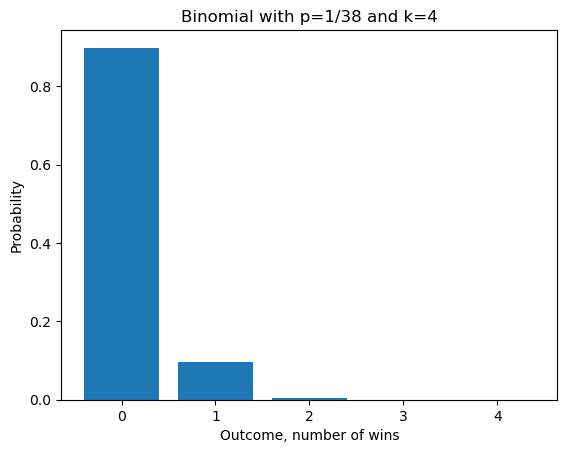

In [8]:
plt.bar(krange5, winprob)
plt.title("Binomial with p=1/38 and k=4")
plt.xlabel("Outcome, number of wins")
plt.ylabel("Probability")

In [9]:
# To answer questions involving inequalities, like "at least 2 wins,"
# the cumulative sum of the above is useful.

In [10]:
cumprob = binom.cdf(k=krange5, p=1/38, n=4)

Text(0, 0.5, 'Cumulative probability')

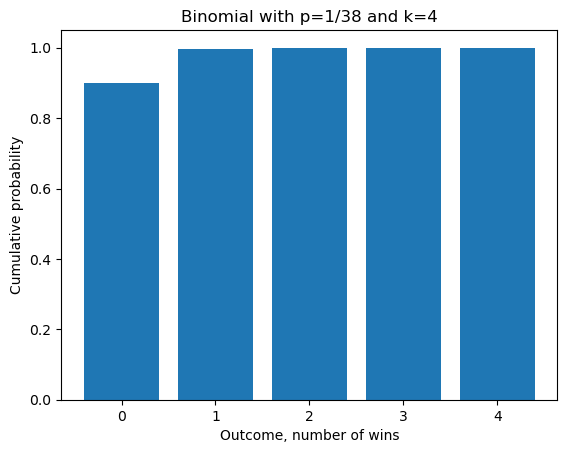

In [11]:
plt.bar(krange5, cumprob)
plt.title("Binomial with p=1/38 and k=4")
plt.xlabel("Outcome, number of wins")
plt.ylabel("Cumulative probability")

Text(0, 0.5, 'Cumulative probability')

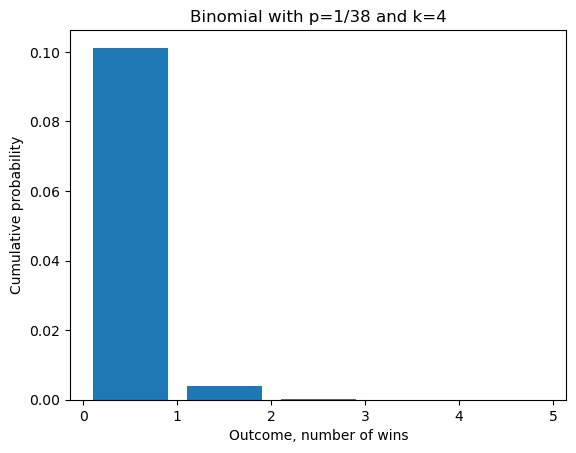

In [12]:
plt.bar(krange5+0.5, 1-cumprob)
plt.title("Binomial with p=1/38 and k=4")
plt.xlabel("Outcome, number of wins")
plt.ylabel("Cumulative probability")

In [13]:
# The quantile function has a different domain; it's the inverse of cdf and
# takes values between 0 and 1.

In [14]:
percentilerange = np.arange(0.001, 1, .001)

Text(0.5, 1.0, 'Binomial(1/38, 4) quantile function')

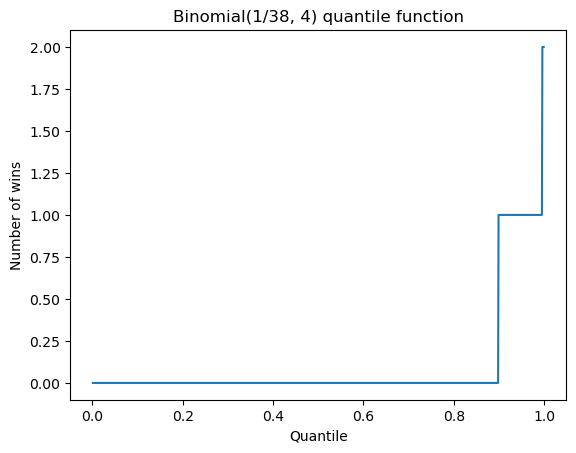

In [15]:
binoppf = binom.ppf(percentilerange, p=1/38, n=4)
plt.plot(percentilerange, binoppf)
plt.xlabel("Quantile")
plt.ylabel("Number of wins")
plt.title("Binomial(1/38, 4) quantile function")

In [16]:
# With three outcomes in play this looks a little weird.  Outcomes of three coin tosses?


Consider the binomial distribution with  p = 0.512 and n = 3872 (number of baby
boys born in 3872 births if sex ratio matches nationwide rate)

In [17]:
binom_sample = binom.rvs(p=0.512, n=3872)
binom_sample

2027

Text(0.5, 1.0, 'Something is wrong with this histogram')

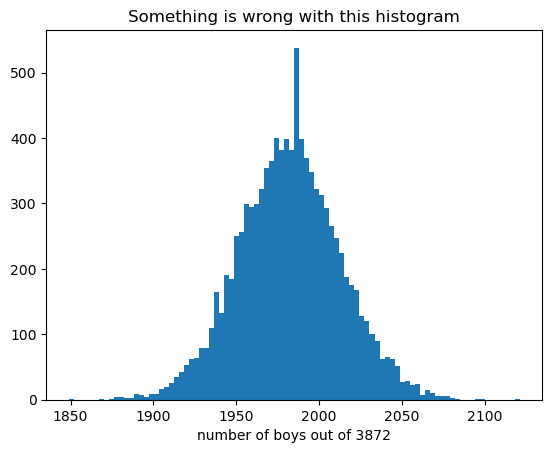

In [18]:
binom_samples = binom.rvs(p=0.512, n=3872, size=10000)
plt.hist(binom_samples, bins=90)
plt.xlabel("number of boys out of 3872")
plt.title("10,000 Binomial variates with p=0.512, n=3872")
plt.title("Something is wrong with this histogram")

Text(0.5, 1.0, 'Something is wrong with this histogram')

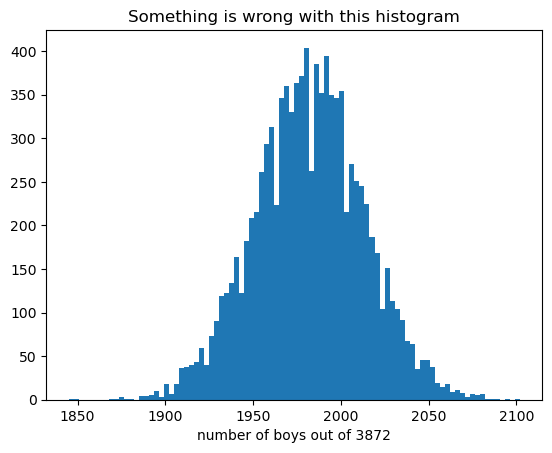

In [19]:
# Exercise for student: fix the plotting problem above
binom_samples = binom.rvs(p=0.512, n=3872, size=10000)
plt.hist(binom_samples, bins=90)
plt.xlabel("number of boys out of 3872")
plt.title("10,000 Binomial variates with p=0.512, n=3872")
plt.title("Something is wrong with this histogram")


In [20]:
# What's the domain of binomial distribution?  

In [21]:
# Why is this ragged?

<BarContainer object of 400 artists>

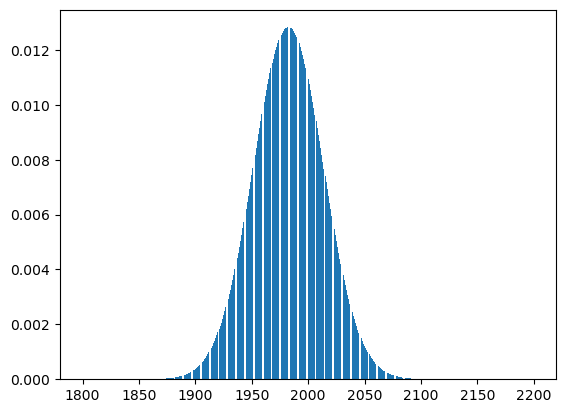

In [22]:
krange = np.arange(1800, 2200)
pbinom = binom.pmf(krange, p=0.512, n=3872)
plt.bar(krange, pbinom)

In [23]:
# Note there is no randomness here; these are calculations of the probabilities.


In [24]:
# Unit normal

Text(0.5, 1.0, '1000 random normal variates')

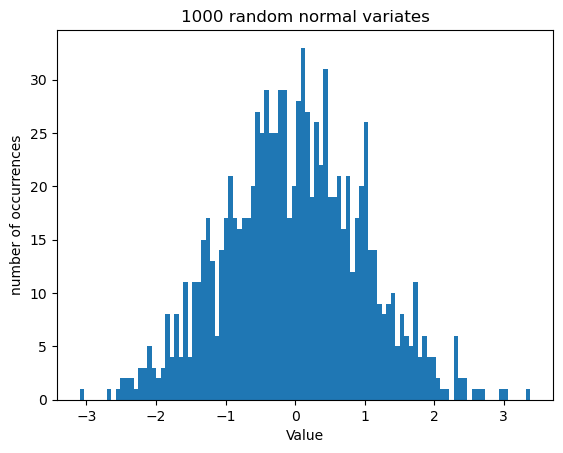

In [25]:
randomnormalvariates = norm.rvs(size=1000)
plt.hist(randomnormalvariates, bins=100)
plt.xlabel("Value")
plt.ylabel("number of occurrences")
plt.title("1000 random normal variates")

Why does this histogram look ragged?? 

In [26]:
# domain for normal ?? 

In [27]:
x = np.arange(-4, 4, .01)

In [28]:
normaldensity = norm.pdf(x) 

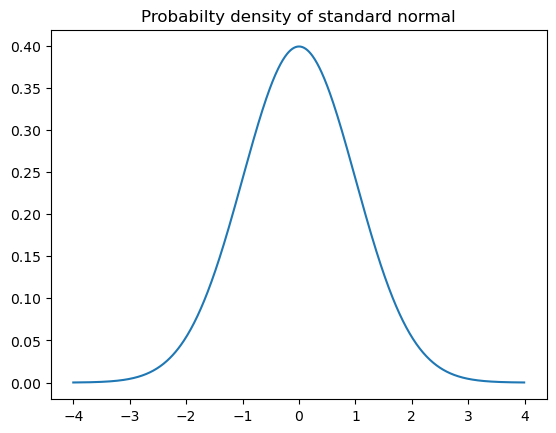

In [29]:
plt.plot(x,normaldensity)
plt.title("Probabilty density of standard normal")
plt.savefig("NORM1.png", dpi=300)

In [30]:
normalcdf = norm.cdf(x)

In [31]:
# PREDICT: what will this look like? 

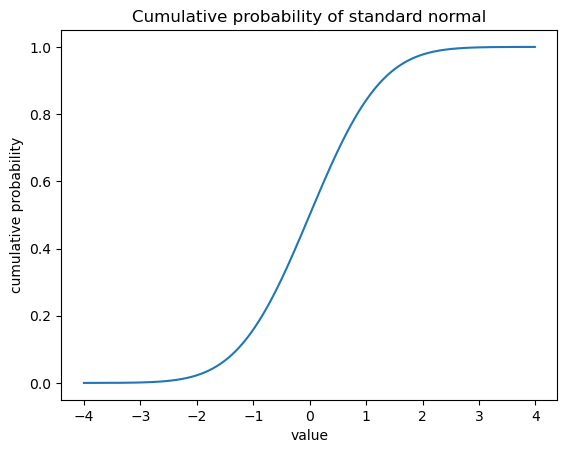

In [32]:
plt.plot(x,normalcdf)
plt.title("Cumulative probability of standard normal")
plt.xlabel("value")
plt.ylabel("cumulative probability")
# A very slightly modified version of this curve goes by the name "the standard error function"
plt.savefig("NORM2.png", dpi=300)

In [33]:
# INVERSE cumulative normal.  The domain and range will be reversed.  What do I
# need for the domain of this function?

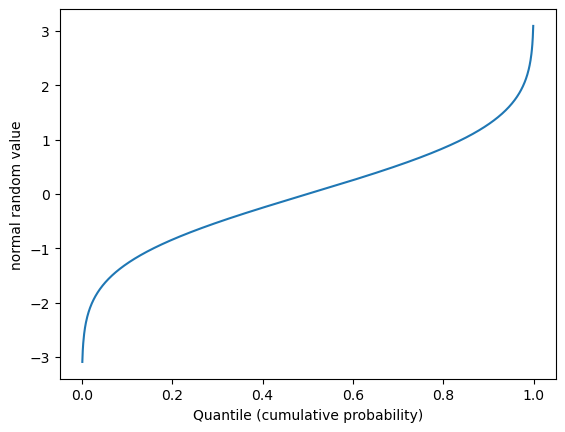

In [34]:
normalppf = norm.ppf(percentilerange)
plt.plot(percentilerange, normalppf)
plt.xlabel("Quantile (cumulative probability)")
plt.ylabel("normal random value")
plt.savefig("NORM3.png", dpi=300)

In [35]:
betaposterior = beta.pdf(percentilerange,a=3, b=6, )

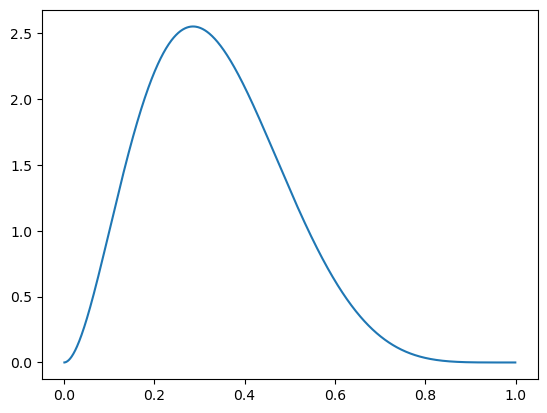

In [36]:
plt.plot(percentilerange, betaposterior)

In [37]:
# But wait, the reason I jumped into this wasn't just to plot PDF - CDF - ICDF
# I wanted to calculate confidence intervals. 

In [38]:
# For 95% confidence bounds, need to evaluate icdf at 
#    (1-95%)/2 and  1- (1-95%) /2 
print("Confidence bounds (z-scores) for the standard normal distribution")
norm.ppf(.025 , loc=0, scale=1), norm.ppf(.975, loc=0, scale=1)

Confidence bounds (z-scores) for the standard normal distribution


(-1.9599639845400545, 1.959963984540054)

In [39]:
values = np.arange(-4, 5)
for v in values:
    print (v, min (norm.cdf(v), 1-norm.cdf(v)))

-4 3.167124183311986e-05
-3 0.0013498980316300933
-2 0.022750131948179195
-1 0.15865525393145707
0 0.5
1 0.15865525393145707
2 0.02275013194817921
3 0.0013498980316301035
4 3.167124183311998e-05


In [40]:
# How do I change this to report \int N  from -1 to 1, \int N() from -2 to 2... ?

In [41]:
for v in range(1,5):
    print(v)

1
2
3
4
